<a href="https://colab.research.google.com/github/Afealete/Personal_fraud_detector/blob/main/fraud_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install required libraries
!pip install shap streamlit scikit-learn pandas matplotlib seaborn -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.6 MB/s eta 0:00:00


In [50]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
import shap
import joblib


In [51]:
#Load dataset
fraud_df = pd.read_csv('/content/Bank_Transaction_Fraud_Detection.csv')
fraud_df

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,b8bdae19-296f-48b7-9104-e055d33a09ac,Vedhika Magar,Female,55,Dadra and Nagar Haveli and Daman and Diu,Diu,Diu Branch,Business,8d856bc7-4666-4509-a067-48d67500694a,08-01-2025,...,Restaurant,37475.11,Desktop/Laptop,"Diu, Dadra and Nagar Haveli and Daman and Diu",ATM,0,INR,+9192629XXXXXX,ATM withdrawal,vedhikaXXXXX@XXXXXXX.com
199996,635bc099-8a93-48ee-829a-bf2283fe8fda,Aashi Pai,Male,51,Manipur,Kangpokpi,Kangpokpi Branch,Business,f2890dbd-4e01-445d-97f5-ac56886e9037,01-01-2025,...,Groceries,53037.20,ATM,"Kangpokpi, Manipur",ATM,0,INR,+9198116XXXXXX,Subscription box,aashiXXX@XXXXXX.com
199997,c1b31cc2-0905-47e8-8cc5-6461d1f3ba33,Dayita Shan,Female,41,Chandigarh,Chandigarh,Chandigarh Branch,Savings,f714b758-7539-474d-b676-5fa7e2480141,28-01-2025,...,Health,96225.36,ATM,"Chandigarh, Chandigarh",Desktop,0,INR,+9192601XXXXXX,Charity donation,dayitaXXXX@XXXXXXX.com
199998,32bb8e66-f3fa-43bf-8242-dab9a6116310,Unnati Vyas,Female,28,Telangana,Nizamabad,Nizamabad Branch,Checking,f6903b6a-b582-47ea-95d5-aff16bdec950,08-01-2025,...,Electronics,89599.90,Voice Assistant,"Nizamabad, Telangana",Desktop,0,INR,+9197537XXXXXX,Tourist attraction payment,unnatiXXX@XXXXX.com


(200000, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  obje

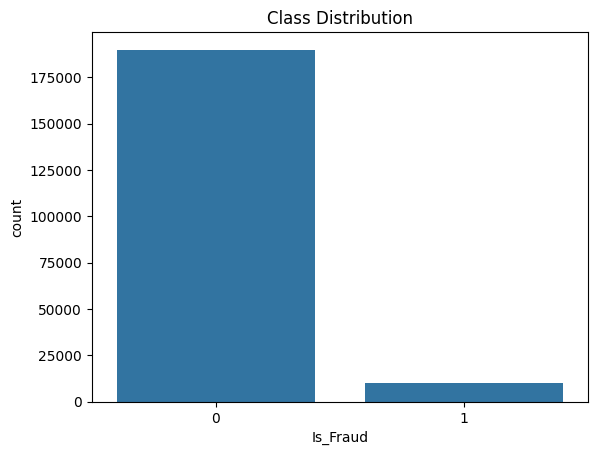

In [52]:
#Exploration of dataset
print(fraud_df.shape)
print(fraud_df.info())
print(fraud_df['Is_Fraud'].value_counts(normalize=True))

# Visualize class imbalance
sns.countplot(x='Is_Fraud', data=fraud_df)
plt.title("Class Distribution")
plt.show()


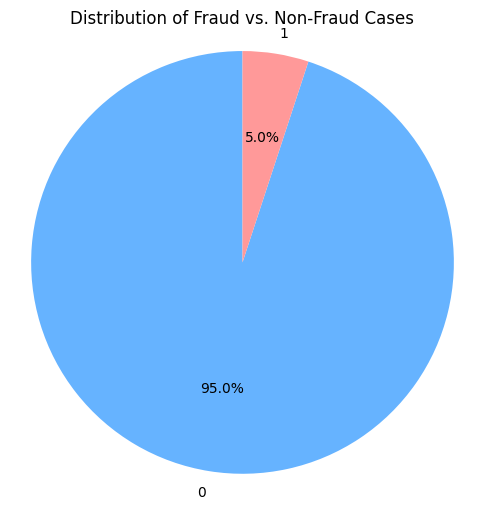

In [53]:
# Get class distribution proportions
fraud_class_distribution = fraud_df['Is_Fraud'].value_counts(normalize=True)

# Pie chart of fraud vs. non-fraud
plt.figure(figsize=(6, 6))
plt.pie(fraud_class_distribution, labels=fraud_class_distribution.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Distribution of Fraud vs. Non-Fraud Cases')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle
plt.show()


In [54]:
#Handling Missing Values
fraud_df.isnull().sum()

,0
Customer_ID,0
Customer_Name,0
Gender,0
Age,0
State,0
City,0
Bank_Branch,0
Account_Type,0
Transaction_ID,0
Transaction_Date,0


In [55]:
#Hnadling missing values
fraud_df = fraud_df.dropna()  # drops rows with any null value
fraud_df.isnull().sum()

,0
Customer_ID,0
Customer_Name,0
Gender,0
Age,0
State,0
City,0
Bank_Branch,0
Account_Type,0
Transaction_ID,0
Transaction_Date,0


In [56]:
#Checking for duplicates
fraud_df.duplicated().sum()

np.int64(0)

In [57]:
#getting  categorical features
fraud_df.select_dtypes(include=['object']).columns

Index(['Customer_ID', 'Customer_Name', 'Gender', 'State', 'City',
       'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date',
       'Transaction_Time', 'Merchant_ID', 'Transaction_Type',
       'Merchant_Category', 'Transaction_Device', 'Transaction_Location',
       'Device_Type', 'Transaction_Currency', 'Customer_Contact',
       'Transaction_Description', 'Customer_Email'],
      dtype='object')

In [58]:
#Dropping unwanted features
fraud_df.drop(columns=['Customer_ID', 'Customer_Name', 'Transaction_ID', 'Customer_Contact','Customer_Email'], inplace=True)
fraud_df

,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Date,Transaction_Time,Transaction_Amount,Merchant_ID,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Transaction_Description
0,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,23-01-2025,16:04:07,32415.45,214e03c5-5c34-40d1-a66c-f440aa2bbd02,Transfer,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,Bitcoin transaction
1,Female,51,Maharashtra,Nashik,Nashik Branch,Business,11-01-2025,17:14:53,43622.60,f9e3f11f-28d3-4199-b0ca-f225a155ede6,Bill Payment,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,Grocery delivery
2,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,25-01-2025,03:09:52,63062.56,97977d83-5486-4510-af1c-8dada3e1cfa0,Bill Payment,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,Mutual fund investment
3,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,19-01-2025,12:27:02,14000.72,f45cd6b3-5092-44d0-8afb-490894605184,Debit,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,Food delivery
4,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,30-01-2025,18:30:46,18335.16,70dd77dd-3b00-4b2c-8ebc-cfb8af5f6741,Transfer,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,Debt repayment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,Female,55,Dadra and Nagar Haveli and Daman and Diu,Diu,Diu Branch,Business,08-01-2025,18:42:09,98513.74,72817d4a-830b-4d16-bf74-244dccfe4cc4,Credit,Restaurant,37475.11,Desktop/Laptop,"Diu, Dadra and Nagar Haveli and Daman and Diu",ATM,0,INR,ATM withdrawal
199996,Male,51,Manipur,Kangpokpi,Kangpokpi Branch,Business,01-01-2025,20:51:21,40593.55,087718f9-1faa-44ef-b162-24d20ddc903c,Withdrawal,Groceries,53037.20,ATM,"Kangpokpi, Manipur",ATM,0,INR,Subscription box
199997,Female,41,Chandigarh,Chandigarh,Chandigarh Branch,Savings,28-01-2025,10:47:40,61579.70,a313cfbc-ef3d-4e59-8347-a948ac292a6f,Withdrawal,Health,96225.36,ATM,"Chandigarh, Chandigarh",Desktop,0,INR,Charity donation
199998,Female,28,Telangana,Nizamabad,Nizamabad Branch,Checking,08-01-2025,06:26:41,39488.22,08ef8813-dea0-42bf-9df5-0a63fe07673d,Debit,Electronics,89599.90,Voice Assistant,"Nizamabad, Telangana",Desktop,0,INR,Tourist attraction payment


In [59]:
# Target separation
X = fraud_df.drop(columns=['Is_Fraud'])
y = fraud_df['Is_Fraud']
X


,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_Date,Transaction_Time,Transaction_Amount,Merchant_ID,Transaction_Type,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Transaction_Currency,Transaction_Description
0,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,23-01-2025,16:04:07,32415.45,214e03c5-5c34-40d1-a66c-f440aa2bbd02,Transfer,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,INR,Bitcoin transaction
1,Female,51,Maharashtra,Nashik,Nashik Branch,Business,11-01-2025,17:14:53,43622.60,f9e3f11f-28d3-4199-b0ca-f225a155ede6,Bill Payment,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,INR,Grocery delivery
2,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,25-01-2025,03:09:52,63062.56,97977d83-5486-4510-af1c-8dada3e1cfa0,Bill Payment,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,INR,Mutual fund investment
3,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,19-01-2025,12:27:02,14000.72,f45cd6b3-5092-44d0-8afb-490894605184,Debit,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,INR,Food delivery
4,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,30-01-2025,18:30:46,18335.16,70dd77dd-3b00-4b2c-8ebc-cfb8af5f6741,Transfer,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,INR,Debt repayment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,Female,55,Dadra and Nagar Haveli and Daman and Diu,Diu,Diu Branch,Business,08-01-2025,18:42:09,98513.74,72817d4a-830b-4d16-bf74-244dccfe4cc4,Credit,Restaurant,37475.11,Desktop/Laptop,"Diu, Dadra and Nagar Haveli and Daman and Diu",ATM,INR,ATM withdrawal
199996,Male,51,Manipur,Kangpokpi,Kangpokpi Branch,Business,01-01-2025,20:51:21,40593.55,087718f9-1faa-44ef-b162-24d20ddc903c,Withdrawal,Groceries,53037.20,ATM,"Kangpokpi, Manipur",ATM,INR,Subscription box
199997,Female,41,Chandigarh,Chandigarh,Chandigarh Branch,Savings,28-01-2025,10:47:40,61579.70,a313cfbc-ef3d-4e59-8347-a948ac292a6f,Withdrawal,Health,96225.36,ATM,"Chandigarh, Chandigarh",Desktop,INR,Charity donation
199998,Female,28,Telangana,Nizamabad,Nizamabad Branch,Checking,08-01-2025,06:26:41,39488.22,08ef8813-dea0-42bf-9df5-0a63fe07673d,Debit,Electronics,89599.90,Voice Assistant,"Nizamabad, Telangana",Desktop,INR,Tourist attraction payment


In [60]:
# Encode categorical features
#Label encoding
for col in X.select_dtypes(include='object'):
    X[col] = X[col].astype('category').cat.codes

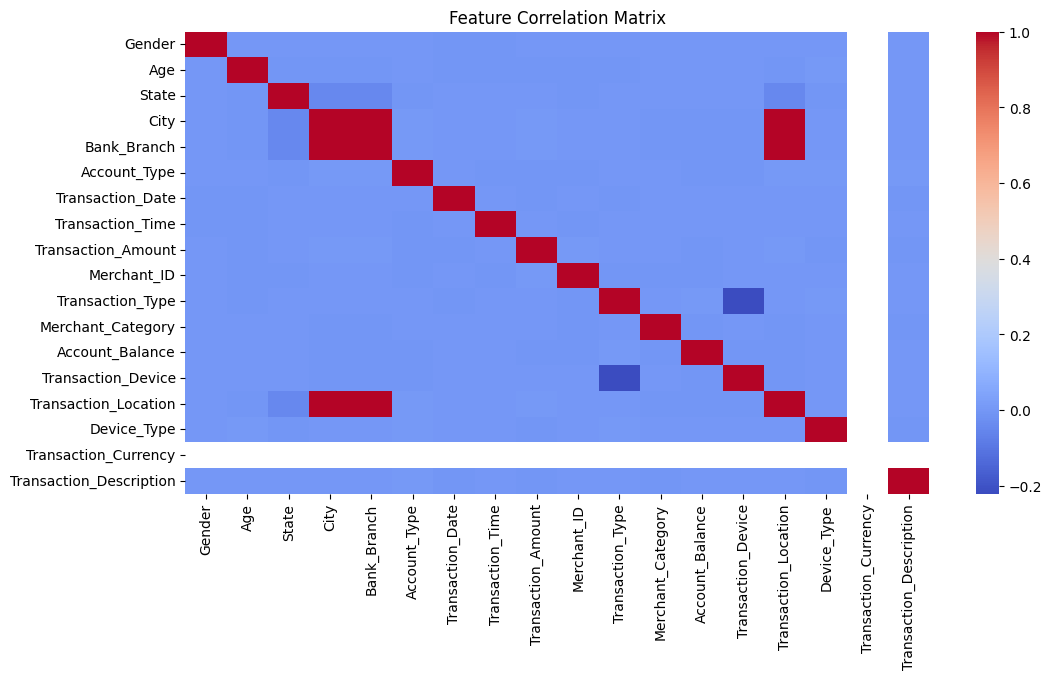

In [61]:
# Correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(X.corr(), cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [62]:
#Normalization
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [75]:
import time

# ⏱️ For benchmarking runtime
start = time.time()

# Parameter grid
param_grid = {
    'n_estimators': [50],  # Reduced to 1 value for speed (tweak later for robustness)
    'max_samples': ['auto'],
    'contamination': [0.01, 0.02, 0.05, 0.1]
}

# Initialize tracking variables
best_model = None
best_f1 = 0
results = []

# Loop through parameter combinations
for n in param_grid['n_estimators']:
    for s in param_grid['max_samples']:
        for c in param_grid['contamination']:
            iso = IsolationForest(
                n_estimators=n,
                max_samples=s,
                contamination=c,
                n_jobs=-1,
                random_state=42
            )
            preds = iso.fit_predict(X_scaled)
            preds = np.where(preds == -1, 1, 0)

            #Compare the model’s anomaly predictions (preds) against real fraud labels (y)
            f1 = f1_score(y, preds)
            precision = precision_score(y, preds)
            recall = recall_score(y, preds)

            results.append({
                'n_estimators': n,
                'max_samples': s,
                'contamination': c,
                'F1': f1,
                'Precision': precision,
                'Recall': recall
            })

            if f1 > best_f1:
                best_f1 = f1
                best_model = iso
                best_preds = preds

print(f"✅ Search completed in {round(time.time() - start, 2)} seconds")

# ⏹️ Results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='F1', ascending=False)
print(results_df)

# Final predictions
anomaly_score = best_preds




✅ Search completed in 7.92 seconds
   n_estimators max_samples  contamination        F1  Precision    Recall
3            50        auto           0.10  0.068001    0.05115  0.101408
2            50        auto           0.05  0.052170    0.05240  0.051943
1            50        auto           0.02  0.029103    0.05125  0.020321
0            50        auto           0.01  0.017042    0.05150  0.010210


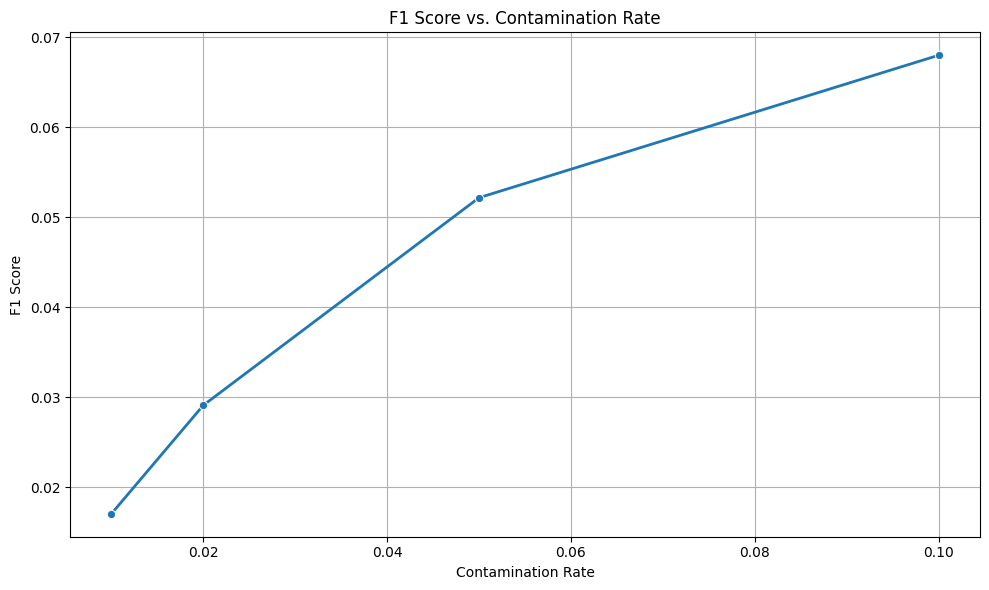

In [76]:
# Convert 'contamination' column to numeric (in case it's object type)
results_df['contamination'] = results_df['contamination'].astype(float)

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='contamination', y='F1', marker='o', linewidth=2)

plt.title('F1 Score vs. Contamination Rate')
plt.xlabel('Contamination Rate')
plt.ylabel('F1 Score')
plt.grid(True)
plt.tight_layout()
plt.show()


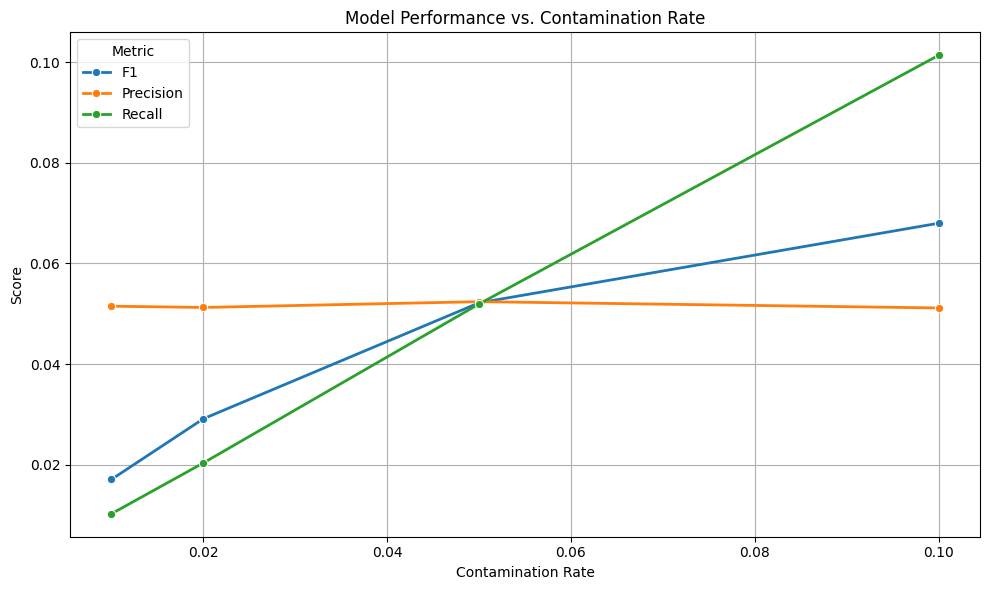

In [77]:
# Melt the DataFrame for seaborn multi-line plotting
melted = results_df.melt(id_vars='contamination', value_vars=['F1', 'Precision', 'Recall'],
                         var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=melted, x='contamination', y='Score', hue='Metric', marker='o', linewidth=2)

plt.title('Model Performance vs. Contamination Rate')
plt.xlabel('Contamination Rate')
plt.ylabel('Score')
plt.grid(True)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


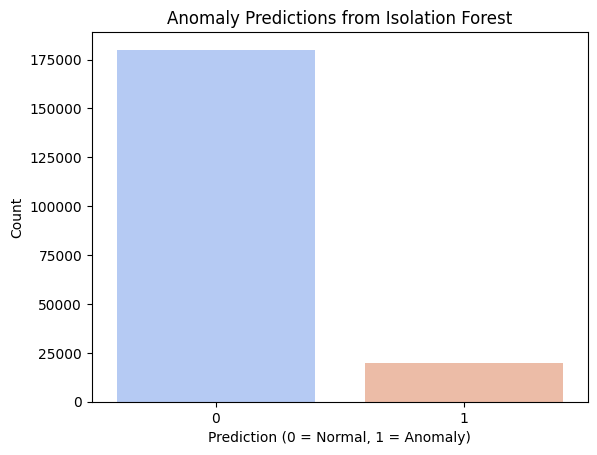

   Label  Proportion
0      0         0.9
1      1         0.1


In [78]:
# Create a DataFrame if anomaly_score is still a NumPy array
anomaly_df = pd.DataFrame({'anomaly_score': anomaly_score})

# Visualize anomaly class counts
sns.countplot(data=anomaly_df, x='anomaly_score', hue='anomaly_score', palette='coolwarm', legend=False)
plt.title("Anomaly Predictions from Isolation Forest")
plt.xlabel("Prediction (0 = Normal, 1 = Anomaly)")
plt.ylabel("Count")
plt.show()
print(anomaly_df['anomaly_score'].value_counts(normalize=True).rename_axis('Label').reset_index(name='Proportion'))

In [79]:
# Fit KMeans (2 clusters: 0 = normal, 1 = fraud)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Use distance from centroid to flag top 1% as anomaly
centroids = kmeans.cluster_centers_
assigned = centroids[kmeans_labels]
distances = np.linalg.norm(X_scaled - assigned, axis=1)

# Flag top 1% farthest points as anomalies
threshold = np.percentile(distances, 99)
kmeans_anomaly = (distances >= threshold).astype(int)

# Evaluate against actual labels
f1_k = f1_score(y, kmeans_anomaly)
precision_k = precision_score(y, kmeans_anomaly)
recall_k = recall_score(y, kmeans_anomaly)

# ----- Combine with Isolation Forest Results -----
isolation_forest_summary = results_df.sort_values(by='F1', ascending=False).head(1).copy()
isolation_forest_summary['Model'] = 'Isolation Forest'
isolation_forest_summary = isolation_forest_summary[['Model', 'F1', 'Precision', 'Recall']]

kmeans_results = pd.DataFrame([{
    'Model': 'KMeans',
    'F1': f1_k,
    'Precision': precision_k,
    'Recall': recall_k
}])

comparison_df = pd.concat([isolation_forest_summary, kmeans_results], ignore_index=True)
print("🔍 Unsupervised Model Comparison:")
print(comparison_df.sort_values(by='F1', ascending=False))

🔍 Unsupervised Model Comparison:
              Model        F1  Precision    Recall
0  Isolation Forest  0.068001    0.05115  0.101408
1            KMeans  0.017538    0.05300  0.010508


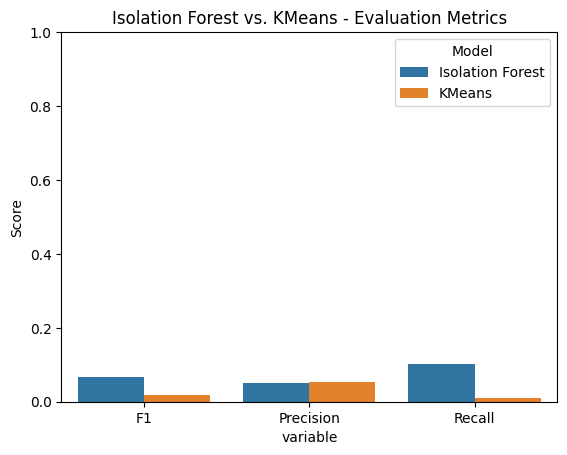

In [80]:
sns.barplot(data=comparison_df.melt(id_vars='Model'), x='variable', y='value', hue='Model')
plt.title('Isolation Forest vs. KMeans - Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Model')
plt.show()


In [81]:
isolation_forest_results = results_df.copy()
isolation_forest_results['Model'] = 'Isolation Forest'
isolation_forest_summary = isolation_forest_results.groupby('Model').max(numeric_only=True).reset_index()

# Combine both
combined_results = pd.concat([isolation_forest_summary, kmeans_results], ignore_index=True)
combined_results = combined_results[['Model', 'F1', 'Precision', 'Recall']]
combined_results.sort_values(by='F1', ascending=False, inplace=True)

print("🔍 Best Unsupervised Model Comparison:")
print(combined_results)


🔍 Best Unsupervised Model Comparison:
              Model        F1  Precision    Recall
0  Isolation Forest  0.068001     0.0524  0.101408
1            KMeans  0.017538     0.0530  0.010508


In [82]:
#Feature Fusion
X_scaled = X_scaled.copy()
X_scaled['anomaly_score'] = anomaly_score


In [85]:
# 🧠 Supervised Learning with Random Forest + SMOTE + Hyperparameter Tuning
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import time

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

#Pipeline with SMOTE + Random Forest
smote = SMOTE(random_state=42)
rf = RandomForestClassifier(random_state=42)

rf_params = {
    'clf__n_estimators': [100],
    'clf__max_depth': [10, None],
    'clf__min_samples_split': [2, 5],
    'clf__class_weight': ['balanced']
}

rf_pipe = Pipeline([
    ('smote', smote),
    ('clf', rf)
])



In [86]:
#Grid Search with Stratified K-Fold
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    rf_pipe,
    param_grid=rf_params,
    cv=cv,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

start_time = time.time()
grid_search.fit(X_train, y_train)
# Best Model
best_rf = grid_search.best_estimator_
print(f"✅ Best Model: {best_rf}")
print(f"⏱️ Training completed in {round(time.time() - start_time, 2)} seconds")


Fitting 3 folds for each of 4 candidates, totalling 12 fits
✅ Best Model: Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        random_state=42))])
⏱️ Training completed in 1086.66 seconds



Threshold: 0.3
F1: 0.09511142829337918
Precision: 0.05088687562914367
Recall: 0.7264618434093162

Threshold: 0.4
F1: 0.0933158347286962
Precision: 0.0513471786443548
Recall: 0.5109018830525273

Threshold: 0.5
F1: 0.07903313416621402
Precision: 0.05443322109988777
Recall: 0.1442021803766105


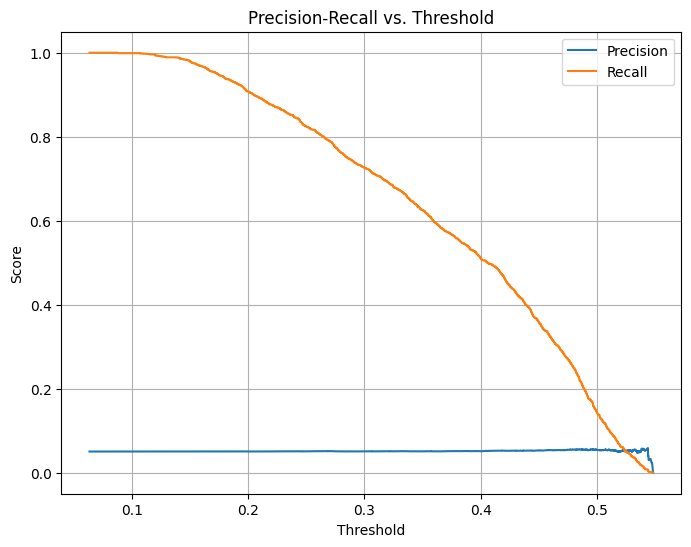

In [87]:
from sklearn.metrics import precision_recall_curve

# Get predicted class probabilities for the positive class (fraud = 1)
y_probs = best_rf.predict_proba(X_test)[:, 1]


# Try a few thresholds
for threshold in [0.3, 0.4, 0.5]:
    y_pred_thresh = (y_probs >= threshold).astype(int)
    print(f"\nThreshold: {threshold}")
    print("F1:", f1_score(y_test, y_pred_thresh))
    print("Precision:", precision_score(y_test, y_pred_thresh))
    print("Recall:", recall_score(y_test, y_pred_thresh))

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs. Threshold")
plt.legend()
plt.grid(True)
plt.show()


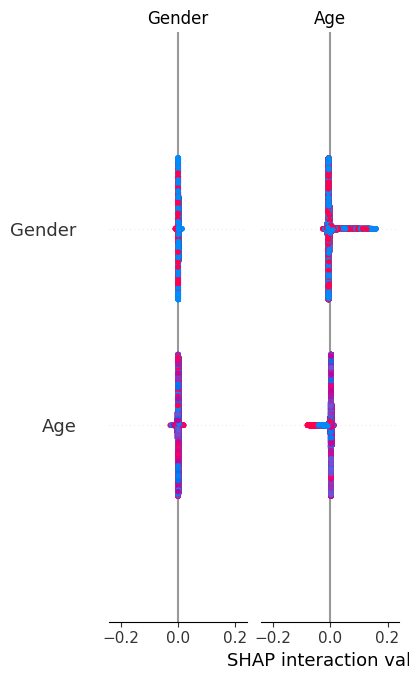


🔍 Top Contributing Features:
• Transaction_Type: average impact score = 0.0319
• Merchant_Category: average impact score = 0.0301
• anomaly_score: average impact score = 0.0296
• Transaction_Device: average impact score = 0.0266
• Device_Type: average impact score = 0.0229

🧠 Interpretation: The features above had the largest influence (positive or negative) on the model's predictions. A high SHAP value means a strong push toward predicting fraud or non-fraud.


In [88]:
# Use TreeExplainer for tree-based models
explainer = shap.Explainer(best_rf.named_steps['clf'])
shap_values = explainer(X_test)

def interpret_shap_summary(shap_values, feature_data, top_n=5):
    """
    Interprets SHAP summary bar values and prints the most impactful features.

    Parameters:
    - shap_values: SHAP values from explainer
    - feature_data: The DataFrame or array used for the SHAP summary plot
    - top_n: How many top features to describe
    """

    # Average absolute SHAP values across all samples
    mean_abs_shap = np.abs(shap_values.values[:, :, 1]).mean(axis=0)
    feature_names = feature_data.columns if hasattr(feature_data, 'columns') else [f'Feature {i}' for i in range(len(mean_abs_shap))]

    # Create summary table
    shap_summary = pd.DataFrame({
        'Feature': feature_names,
        'Mean |SHAP value|': mean_abs_shap
    }).sort_values(by='Mean |SHAP value|', ascending=False).head(top_n)

    print("\n🔍 Top Contributing Features:")
    for i, row in shap_summary.iterrows():
        print(f"• {row['Feature']}: average impact score = {row['Mean |SHAP value|']:.4f}")

    print(f"\n🧠 Interpretation: The features above had the largest influence (positive or negative) on the model's predictions. A high SHAP value means a strong push toward predicting fraud or non-fraud.")

    return shap_summary

# Natural language explanation
shap.summary_plot(shap_values, X_test, plot_type='bar')
shap_summary_df = interpret_shap_summary(shap_values, X_test)


🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     37982
           1       0.05      0.14      0.08      2018

    accuracy                           0.83     40000
   macro avg       0.50      0.51      0.49     40000
weighted avg       0.90      0.83      0.86     40000

🔍 ROC-AUC Score: 0.5110467080567453


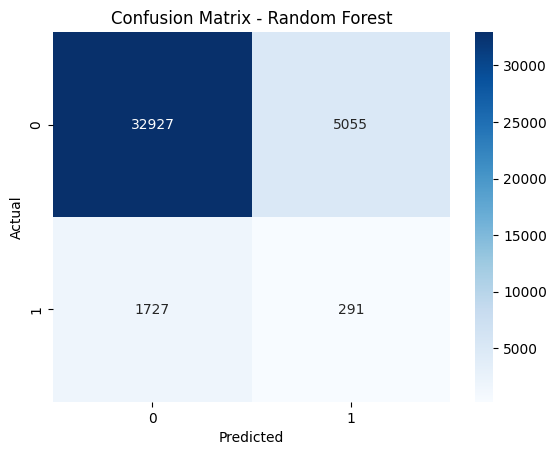

In [89]:
# Evaluation
y_pred = best_rf.predict(X_test)
print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred))
print("🔍 ROC-AUC Score:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]))

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [90]:
# Load and preprocess raw data again
fraud_df = pd.read_csv('/content/Bank_Transaction_Fraud_Detection.csv')
fraud_df = fraud_df.dropna()

# Drop unwanted columns
fraud_df.drop(columns=['Customer_ID', 'Customer_Name', 'Transaction_ID',
                       'Customer_Contact', 'Customer_Email'], inplace=True)

# Separate features and target
y = fraud_df['Is_Fraud']
X_raw = fraud_df.drop(columns=['Is_Fraud'])

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y, test_size=0.2, stratify=y, random_state=42
)


In [91]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define column groups
numeric_cols = ['Transaction_Amount', 'Account_Balance']
categorical_cols = ['Transaction_Type', 'City', 'Merchant_Category', 'Device_Type']

# Build preprocessor with string support
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])


In [92]:
from sklearn.base import BaseEstimator, TransformerMixin

class AnomalyScoreAdder(BaseEstimator, TransformerMixin):
    def __init__(self, iso_model, numeric_cols, scaler):
        self.iso_model = iso_model
        self.numeric_cols = numeric_cols
        self.scaler = scaler  # Used only to transform numeric inputs for ISO Forest

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        numeric_data = self.scaler.transform(X_copy[self.numeric_cols])
        scores = self.iso_model.decision_function(numeric_data)
        X_copy['anomaly_score'] = scores
        return X_copy


In [93]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Fit Isolation Forest on numeric data
iso_model = IsolationForest(contamination=0.02, random_state=42)
scaled_for_iso = StandardScaler().fit(X[numeric_cols])  # Save this for anomaly transformer
X_numeric_scaled = scaled_for_iso.transform(X[numeric_cols])
iso_model.fit(X_numeric_scaled)

# Train supervised classifier
classifier = RandomForestClassifier(n_estimators=50, class_weight='balanced', random_state=42, n_jobs=-1)
classifier.fit(X_train, y_train)

# Build full pipeline (strings in → predictions out)
full_pipeline = Pipeline(steps=[
    ('add_anomaly', AnomalyScoreAdder(iso_model, numeric_cols, scaled_for_iso)),
    ('preprocessing', preprocessor),  # handles raw strings
    ('classifier', classifier)
])
# Fit with your actual training data
full_pipeline.fit(X_train_raw, y_train)  # X_train_raw should be raw strings, not encoded or scaled



Pipeline(steps=[('add_anomaly',
                 AnomalyScoreAdder(iso_model=IsolationForest(contamination=0.02,
                                                             random_state=42),
                                   numeric_cols=['Transaction_Amount',
                                                 'Account_Balance'],
                                   scaler=StandardScaler())),
                ('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Transaction_Amount',
                                                   'Account_Balance']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Transaction_Type', 'City',
                                                   'Merchant_Category',
                                                   'Device_Type'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=50, n_jobs=-1,
                                        random_state=42))])

In [94]:
joblib.dump(full_pipeline, 'fraud_pipeline.pkl')


['fraud_pipeline.pkl']

In [95]:
def predict_transaction(user_input_dict):
    import pandas as pd
    model = joblib.load('fraud_pipeline.pkl')
    df = pd.DataFrame([user_input_dict])
    proba = model.predict_proba(df)[0][1]
    pred = int(proba >= 0.5)
    return {
        "Prediction": "⚠️ Fraud" if pred else "✅ Not Fraud",
        "Probability": round(proba, 4)
    }


In [99]:
sample = {
    'Transaction_Amount': 10000,
    'Account_Balance': 190,
    'Transaction_Type': 'POS',
    'City': 'Accra',
    'Merchant_Category': 'Grocery',
    'Device_Type': 'Mobile'
}

print(predict_transaction(sample))


{'Prediction': '✅ Not Fraud', 'Probability': np.float64(0.08)}


In [101]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 82.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.7 MB/s eta 0:00:00


In [102]:
import streamlit as st


# Cache model loading
@st.cache_resource
def load_model():
    return joblib.load("fraud_pipeline.pkl")

model = load_model()

# Page setup
st.set_page_config(page_title="Fraud Detector", layout="centered")
st.title("💳 Real-Time Fraud Detection")
st.markdown("Use the controls below to test transactions and understand prediction behavior.")

# Session state for prediction history
if 'history' not in st.session_state:
    st.session_state.history = []

# Sidebar controls
st.sidebar.header("⚙️ Options")
threshold = st.sidebar.slider("Decision Threshold", 0.0, 1.0, 0.5, 0.01)
show_shap = st.sidebar.checkbox("Show SHAP Explanation (local)", value=False)

# Form for input
with st.form("predictor"):
    amount = st.number_input("Transaction Amount", min_value=0.0)
    balance = st.number_input("Account Balance", min_value=0.0)
    trans_type = st.selectbox("Transaction Type", ['POS', 'Online', 'Transfer'])
    city = st.selectbox("City", ['Accra', 'Kumasi', 'Tamale', 'Takoradi'])
    category = st.selectbox("Merchant Category", ['Grocery', 'Electronics', 'Travel', 'Clothing'])
    device = st.selectbox("Device Type", ['Mobile', 'Desktop', 'ATM'])

    submitted = st.form_submit_button("🔍 Predict")

# Prediction logic
if submitted:
    input_data = {
        'Transaction_Amount': amount,
        'Account_Balance': balance,
        'Transaction_Type': trans_type,
        'City': city,
        'Merchant_Category': category,
        'Device_Type': device
    }

    df = pd.DataFrame([input_data])
    proba = model.predict_proba(df)[0][1]
    pred = int(proba >= threshold)

    # Save to history
    st.session_state.history.append({
        "Transaction_Amount": amount,
        "Balance": balance,
        "Prediction": "⚠️ Fraud" if pred else "✅ Not Fraud",
        "Probability": round(proba, 4)
    })

    # Display prediction
    st.subheader("🎯 Prediction Result")
    if pred:
        st.error(f"⚠️ Fraud Detected! (Probability: {round(proba, 4)})")
    else:
        st.success(f"✅ Not Fraudulent (Probability: {round(proba, 4)})")

    # SHAP Explanation (optional)
    if show_shap:
        st.markdown("#### 🔍 SHAP Explanation")
        explainer = shap.Explainer(model.named_steps['classifier'])
        X_transformed = model.named_steps['preprocessing'].transform(
            model.named_steps['add_anomaly'].transform(df)
        )
        shap_values = explainer(X_transformed)
        st.set_option('deprecation.showPyplotGlobalUse', False)
        shap.plots.waterfall(shap_values[0], max_display=6)
        st.pyplot()

# Show history
if st.session_state.history:
    st.markdown("### 🧾 Recent Predictions")
    hist_df = pd.DataFrame(st.session_state.history)
    st.dataframe(hist_df, use_container_width=True)


2025-07-04 13:44:46.177 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-04 13:44:46.285 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-04 13:44:46.286 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-04 13:44:46.289 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-04 13:44:46.291 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-04 13:44:46.668 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-04 13:44:46.669 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-04 13:44:46.670 Thread 'MainThread': mi

In [106]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
